In [75]:
# importer les modules
import csv, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import decomposition
import scipy.stats

In [66]:
# Lecture des fichiers texte en CSV
# ouvrir et lire le fichier concerne
fichier ="liste2.csv"
fichier_lire=open(fichier,"r")
fichier_csv = csv.reader(fichier_lire,delimiter=";")
tab=list(fichier_csv) 
mvector=np.asarray(tab)
M=mvector[1:,:].astype(np.float)
#print(mvector[1:,:])



In [96]:
fichier_lire=open(fichier,"r")
csv = pd.read_csv(fichier_lire,delimiter=",")
cov=np.cov(M,rowvar=1)
print(cov.shape)

(294, 294)


PCA de la matrice de covariance 

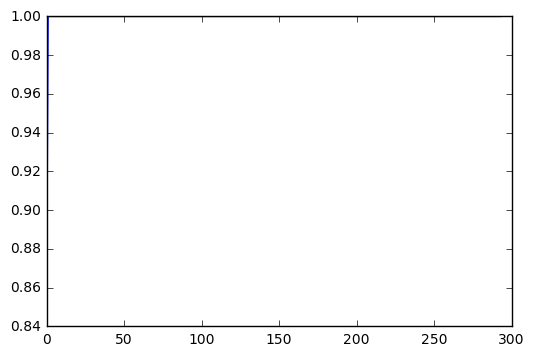

In [98]:
pca_full=decomposition.PCA()
pca_full.fit_transform(cov)
ratio=pca_full.explained_variance_ratio_
#Variane expliquée cumulée 
cumulative=np.cumsum(ratio)
plt.plot(cumulative)
plt.show()

In [99]:
eigenval=np.linalg.eig(cov)[0]
print(eigenval)

[  8.22853200e+09 +0.00000000e+00j   3.42620800e+09 +0.00000000e+00j
   1.26784176e+06 +0.00000000e+00j   1.74740412e+05 +0.00000000e+00j
   1.24333966e+03 +0.00000000e+00j   1.57537197e+02 +0.00000000e+00j
   1.52226188e+00 +0.00000000e+00j   4.08106550e-01 +0.00000000e+00j
  -1.31983433e-06 +0.00000000e+00j   9.97270459e-07 +0.00000000e+00j
   9.03000066e-07 +0.00000000e+00j  -7.73881193e-07 +3.10341254e-07j
  -7.73881193e-07 -3.10341254e-07j  -7.08035968e-07 +1.30737698e-07j
  -7.08035968e-07 -1.30737698e-07j   4.44770141e-07 +5.51724305e-07j
   4.44770141e-07 -5.51724305e-07j   6.65528342e-07 +2.16872806e-07j
   6.65528342e-07 -2.16872806e-07j  -2.74729053e-07 +6.00667351e-07j
  -2.74729053e-07 -6.00667351e-07j   1.82780272e-07 +6.12862185e-07j
   1.82780272e-07 -6.12862185e-07j  -5.23299866e-07 +3.57525873e-07j
  -5.23299866e-07 -3.57525873e-07j   6.27868417e-07 +0.00000000e+00j
   5.55837710e-07 +0.00000000e+00j   4.12107329e-07 +2.78700136e-07j
   4.12107329e-07 -2.78700136e-07j

    PCA en ne gardant que les deux premieres composantes principales 

In [102]:
pca_final =PCA(n_components=2)
loadings=pca_final.fit_transform(cov)
P=pca_final.components_.transpose()
Pt=P.transpose()
C=P.dot(Pt) #matrice 12x12
#C=loadings.dot(loadings.transpose())
Ctild=np.eye(12,12)-C
Y_mod=C.dot(M.transpose())
Y_res=Ctild.dot(M.transpose())

ValueError: operands could not be broadcast together with shapes (12,12) (294,294) 

In [73]:
for i in range(len(Y_res[0])):
    print(np.linalg.norm(Y_res[:,i])**2,i)

131458.874647 0
132180.253172 1
132675.554751 2
132162.623203 3
132694.614334 4
131539.508702 5
131558.245456 6
131578.947526 7
131549.592484 8
131626.364216 9
131593.258719 10
131616.568777 11
131642.846547 12
132879.671731 13
132208.555947 14
136094.951323 15
136221.062706 16
136349.302734 17
136611.421955 18
136745.550071 19
132393.831913 20
132064.552354 21
133323.815772 22
133376.271386 23
132574.725099 24
133547.331123 25
133606.026205 26
132608.870502 27
132677.693908 28
132807.959364 29
133867.737782 30
132914.525585 31
134010.628813 32
133029.070059 33
134161.539788 34
133215.923639 35
134402.915433 36
133350.484014 37
134573.797904 38
133455.903297 39
133567.333295 40
134845.089625 41
133721.890158 42
135035.963547 43
135134.372025 44
134028.398586 45
134229.539545 46
135547.874958 47
134444.030452 48
135766.70138 49
134672.683412 50
135993.553557 51
136109.978478 52
134817.342157 53
136348.857566 54
136471.280543 55
135136.181243 56
136722.156904 57
135644.057835 58
136980.8

In [85]:
r=2 #Le nombre de composantes principales à garder 
phi1=sum(ratio[r:12])
phi2=sum(ratio[r:12]**2)
phi3=sum(ratio[r:12]**3)
h0=1-2*(phi1*phi3/(3*phi2**2))

#Calcul de c_alpha
alpha=0.1# Niveau de confiance 
normal=scipy.stats.norm(0,1) # Loi normale standard 
c_alpha=normal.ppf(1-alpha)

delta_alpha=phi1*(c_alpha*math.sqrt(2*phi2*h0**2)/phi1 + 1 + (phi2*h0*(h0-1))/phi1**2)**(1/2*h0)
print(delta_alpha)

7.48090672758e-10


1.28155156554
